In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [36]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(df_market_data)
print(df_market_data.columns)
print(crypto_scaled.shape, df_market_data.shape)


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')
(41, 7) (41, 7)


In [43]:
# Create a DataFrame with the scaled data
crypto_scaled_df = pd.DataFrame(crypto_scaled, columns=df_market_data.columns, index=df_market_data.index)


# Copy the crypto names from the original DataFrame
crypto_scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [45]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [48]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the data
    kmeans.fit(crypto_scaled_df)
    
    # Append the model's inertia to the inertia list
    inertia_values.append(kmeans.inertia_)

# Optionally, print the inertia values to check
print(inertia_values)

[287.0, 195.82021818036046, 123.19048183836958, 79.02243535120975, 65.302379141625, 52.88851821977531, 43.91469044757746, 37.517032490103574, 32.485240832183536, 28.222899290608925, 24.545512769147678]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

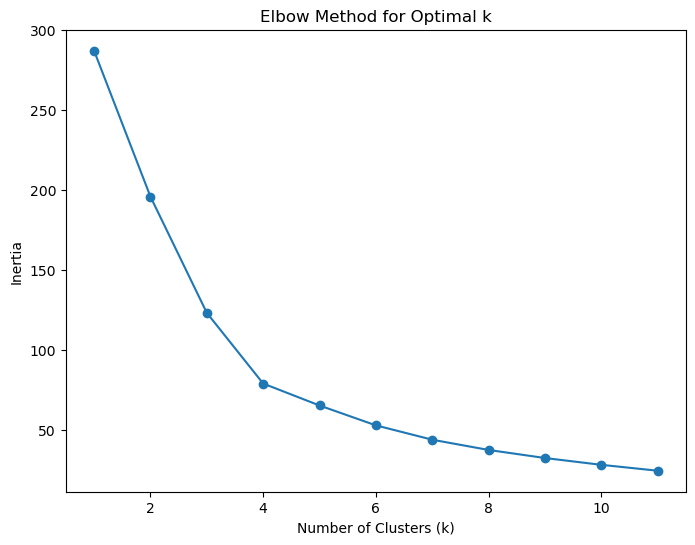

In [47]:
# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

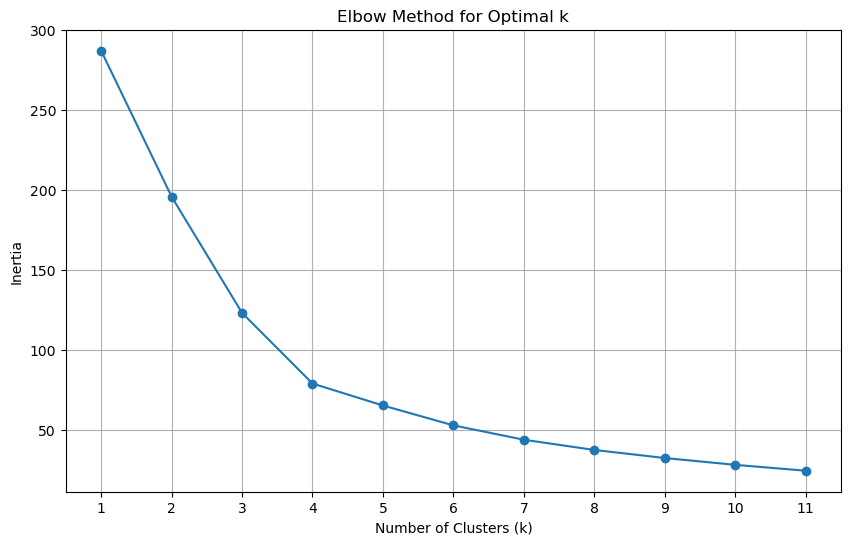

In [49]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Set x-ticks to be the k values
plt.grid()
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:285

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [50]:
# Initialise the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=0)

In [51]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(crypto_scaled_df)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [52]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans.predict(crypto_scaled_df)

# Print the resulting array of cluster values.


In [53]:
# Create a copy of the scaled DataFrame
crypto_scaled_df['Cluster'] = clusters


In [54]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters


# Display the copy of the scaled DataFrame
print(crypto_scaled_df.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [55]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Colour the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = crypto_scaled_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',  # Color by the cluster labels
    cmap='viridis',  # Optional: Choose a color map
    hover_cols=['Cluster'],  # Show cluster in hover
    title='Cryptocurrency Clusters based on Price Change',
    xlabel='Price Change Percentage (24h)',
    ylabel='Price Change Percentage (7d)',
    width=800,  # Optional: Width of the plot
    height=600  # Optional: Height of the plot
)

scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimise Clusters with Principal Component Analysis.

In [56]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [59]:
# Use the PCA model with `fit_transform` to reduce the original scaled Dataframe
# down to three principal components.
pca_transformed_data = pca.fit_transform(crypto_scaled_df)


# View the scaled PCA data
pca_df = pd.DataFrame(pca_transformed_data, columns=['PC1', 'PC2', 'PC3'], index=crypto_scaled_df.index)
print(pca_df.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin       2.034093 -0.641571 -0.357629
ethereum      1.994502 -0.490549 -0.912250
tether       -1.068544 -0.417205  0.596311
ripple       -1.040919 -0.455234  0.467801
bitcoin-cash  3.302764 -1.242458 -0.217276


In [60]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:")
for i, var in enumerate(explained_variance):
    print(f"PC{i + 1}: {var:.4f}")

# Calculate total explained variance
total_explained_variance = explained_variance.sum()
print(f"Total Explained Variance: {total_explained_variance:.4f}")

Explained Variance Ratios:
PC1: 0.3694
PC2: 0.2917
PC3: 0.2289
Total Explained Variance: 0.8900


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:Total Explained Variance: 0.8900

In [61]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca_transformed_data, columns=['PC1', 'PC2', 'PC3'])


# Copy the crypto names from the original scaled DataFrame
pca_df['coin_id'] = crypto_scaled_df.index


# Set the coin_id column as index
pca_df.set_index('coin_id', inplace=True)


# Display the scaled PCA DataFrame
print(pca_df.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin       2.034093 -0.641571 -0.357629
ethereum      1.994502 -0.490549 -0.912250
tether       -1.068544 -0.417205  0.596311
ripple       -1.040919 -0.455234  0.467801
bitcoin-cash  3.302764 -1.242458 -0.217276


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12)) 

In [62]:
# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    # Step 3: Create a KMeans model using the loop counter for n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the PCA data (assuming pca_df is your PCA DataFrame)
    kmeans.fit(pca_df[['PC1', 'PC2', 'PC3']])
    
    # Append the model's inertia to the inertia list
    inertia_values.append(kmeans.inertia_)

# Display the computed inertia values
print(inertia_values)

[325.73473957856186, 201.28762245654346, 111.73680938677634, 40.197284424059205, 29.94590949973282, 20.988916219540748, 15.365024356826527, 12.125400369163668, 10.472156000037026, 7.922170720998354, 6.703949196636492]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [63]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,               # The number of clusters
    'inertia': inertia_values    # The corresponding inertia values
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
print(elbow_df.head())


   k     inertia
0  1  325.734740
1  2  201.287622
2  3  111.736809
3  4   40.197284
4  5   29.945909


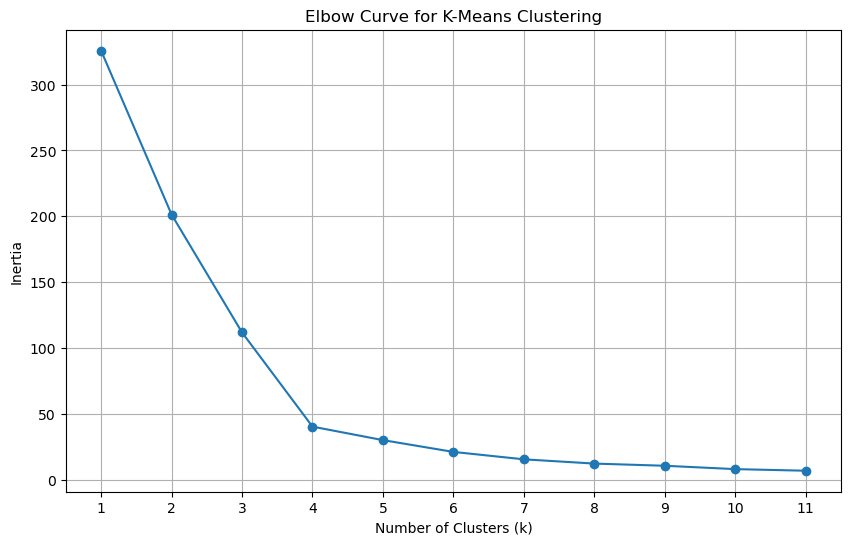

In [64]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])  # Set x-ticks to show each k value
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:335-340


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:yes

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [65]:
# Initialise the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=0)
print(kmeans)

KMeans(n_clusters=4, random_state=0)


In [66]:
# Fit the K-Means model using the scaled PCA DataFrame
kmeans.fit(pca_df[['PC1', 'PC2', 'PC3']]) 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [67]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame

clusters = kmeans.predict(pca_df[['PC1', 'PC2', 'PC3']])

# Print the resulting array of cluster values.
print(clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [68]:
# Create a copy of the scaled PCA DataFrame
pca_clusters_df = pca_df.copy()


# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_clusters_df['cluster'] = clusters  
# Display the copy of the scaled PCA DataFrame
print(pca_clusters_df.head())


                   PC1       PC2       PC3  cluster
coin_id                                            
bitcoin       2.034093 -0.641571 -0.357629        0
ethereum      1.994502 -0.490549 -0.912250        0
tether       -1.068544 -0.417205  0.596311        2
ripple       -1.040919 -0.455234  0.467801        2
bitcoin-cash  3.302764 -1.242458 -0.217276        0


In [69]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Colour the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = pca_clusters_df.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='cluster',               
    cmap='viridis',           # Optional: Set a color map for better visual differentiation
    hover_cols=['coin_id'],   # Include the coin_id for hover information
    title='Cryptocurrency Clusters',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)',
    size=100,                 # Optional: Adjust the size of the points
)
scatter_plot


:Scatter   [PC1]   (PC2,cluster,coin_id)

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

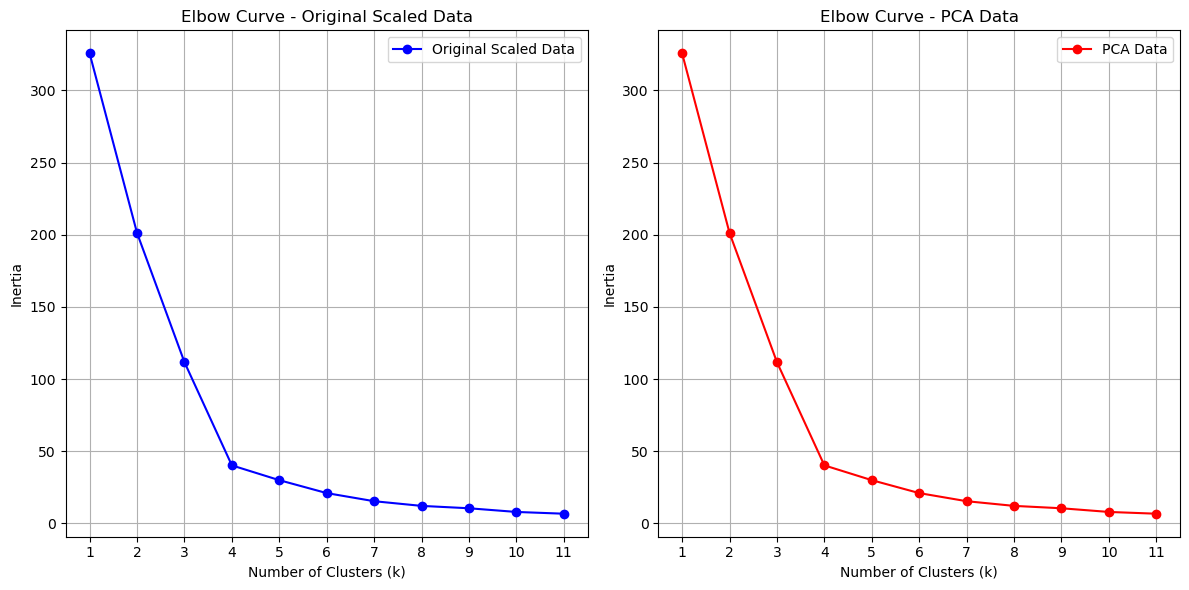

In [73]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!
plt.figure(figsize=(12, 6))
# Plot the Elbow curve for the original scaled DataFrame
plt.subplot(1, 2, 1)  # Create a 1x2 subplot, first plot
plt.plot(k_values, inertia_values, marker='o', color='b', label='Original Scaled Data')
plt.title('Elbow Curve - Original Scaled Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.legend()

# Plot the Elbow curve for the PCA DataFrame
plt.subplot(1, 2, 2)  # Second plot in the 1x2 subplot
plt.plot(k_values, inertia_values, marker='o', color='r', label='PCA Data')
plt.title('Elbow Curve - PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.legend()

# Step 2: Show the composite plot
plt.tight_layout()
plt.show()

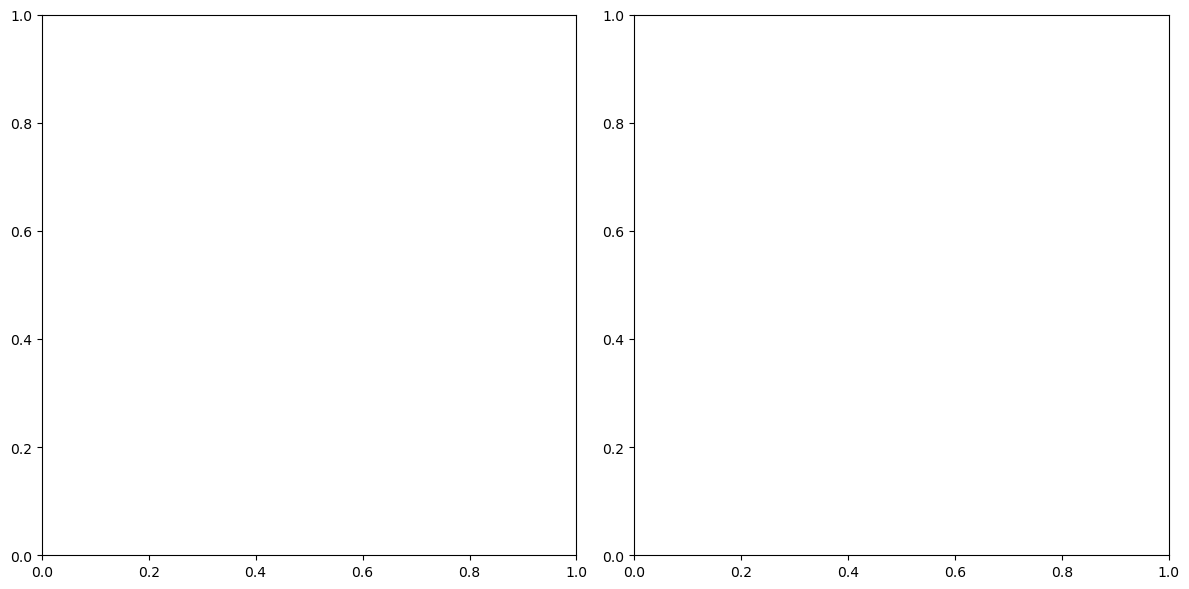

In [74]:
# Composite plot to contrast the clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a 1x2 subplot, first plot
scatter1 = df_market_data.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d',
    c='cluster',               # Use cluster labels for coloring
    cmap='viridis',
    hover_cols=['coin_id'],
    title='Clusters - Original Scaled Data',
    xlabel='Price Change Percentage (24h)',
    ylabel='Price Change Percentage (7d)',
    size=100
)

# Plot clusters for the PCA DataFrame
plt.subplot(1, 2, 2)  # Second plot in the 1x2 subplot
scatter2 = pca_clusters_df.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='cluster',               # Use the cluster labels for coloring
    cmap='viridis',
    hover_cols=['coin_id'],
    title='Clusters - PCA Data',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)',
    size=100
)

# Show the plots
plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 